In [53]:
import requests
from dotenv import load_dotenv
load_dotenv()
import os

In [54]:
import http.client
import json

connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': '3a6d03933d0447719cf4df0d5ddbece3' }
connection.request('GET', '/v2/competitions/PL/matches?season=2018', None, headers )
response = json.loads(connection.getresponse().read().decode())



In [55]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(response)

{   'competition': {   'area': {'id': 2072, 'name': 'England'},
                       'code': 'PL',
                       'id': 2021,
                       'lastUpdated': '2019-11-10T17:28:07Z',
                       'name': 'Premier League',
                       'plan': 'TIER_ONE'},
    'count': 380,
    'filters': {},
    'matches': [   {   'awayTeam': {'id': 338, 'name': 'Leicester City FC'},
                       'group': 'Regular Season',
                       'homeTeam': {'id': 66, 'name': 'Manchester United FC'},
                       'id': 233028,
                       'lastUpdated': '2019-04-20T15:34:33Z',
                       'matchday': 1,
                       'referees': [   {   'id': 11610,
                                           'name': 'Andre Marriner',
                                           'nationality': None},
                                       {   'id': 11611,
                                           'name': 'Scott Ledger',
                

In [59]:
response.status_code

AttributeError: 'dict' object has no attribute 'status_code'

In [60]:
response.keys()

dict_keys(['count', 'filters', 'competition', 'matches'])

In [142]:
response['matches'][:1]

KeyError: 'matches'

In [143]:
response['matches'][0]['homeTeam']['name']

KeyError: 'matches'

In [130]:
import pandas as pd

df = pd.DataFrame.from_dict(response['matches'])
print(len(df)) #Print how many rows
print(df.columns) #Print column names
df.head() #Previews the first five rows. 

3
Index(['id', 'competition', 'season', 'utcDate', 'status', 'matchday', 'stage',
       'group', 'lastUpdated', 'score', 'homeTeam', 'awayTeam', 'referees'],
      dtype='object')


id                             competition  \
0  264451  {'id': 2021, 'name': 'Premier League'}   
1  264456  {'id': 2021, 'name': 'Premier League'}   
2  264452  {'id': 2021, 'name': 'Premier League'}   

                                              season               utcDate  \
0  {'id': 468, 'startDate': '2019-08-09', 'endDat...  2019-11-10T14:00:00Z   
1  {'id': 468, 'startDate': '2019-08-09', 'endDat...  2019-11-10T14:00:00Z   
2  {'id': 468, 'startDate': '2019-08-09', 'endDat...  2019-11-10T16:30:00Z   

     status  matchday           stage           group           lastUpdated  \
0  FINISHED        12  REGULAR_SEASON  Regular Season  2019-11-10T19:34:27Z   
1  FINISHED        12  REGULAR_SEASON  Regular Season  2019-11-10T19:34:27Z   
2  FINISHED        12  REGULAR_SEASON  Regular Season  2019-11-10T19:34:27Z   

                                               score  \
0  {'winner': 'HOME_TEAM', 'duration': 'REGULAR',...   
1  {'winner': 'HOME_TEAM', 'duration': 'REGULAR',...   
2  {'winner': 'HOME_TEAM', 'duration': 'REGULAR',...   

                                           homeTeam  \
0  {'id': 76, 'name': 'Wolverhampton Wanderers FC'}   
1        {'id': 66, 'name': 'Manchester United FC'}   
2                {'id': 64, 'name': 'Liverpool FC'}   

                                           awayTeam  \
0              {'id': 58, 'name': 'Aston Villa FC'}   
1  {'id': 397, 'name': 'Brighton & Hove Albion FC'}   
2          {'id': 65, 'name': 'Manchester City FC'}   

                                            referees  
0  [{'id': 11580, 'name': 'Anthony Taylor', 'nati...  
1  [{'id': 11567, 'name': 'Jonathan Moss', 'natio...  
2  [{'id': 11605, 'name': 'Michael Oliver', 'nati...

In [139]:
connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': '3a6d03933d0447719cf4df0d5ddbece3' }
connection.request('GET', '/v2/matches?dateFrom=2018-08-01?dateTo=2019-05-30', None, headers )
response = json.loads(connection.getresponse().read().decode())





In [140]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(response)

{   'errorCode': 400,
    'message': 'Parameter dateFrom must be used in conjunction with dateTo and '
               'vice versa.'}


In [7]:
import pandas as pd

dft= pd.read_csv('~/Desktop/season-1819_csv.csv')

In [8]:
dft.head()

Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  10/08/2018    Man United       Leicester     2     1   H     1     0   
1  E0  11/08/2018   Bournemouth         Cardiff     2     0   H     1     0   
2  E0  11/08/2018        Fulham  Crystal Palace     0     2   A     0     1   
3  E0  11/08/2018  Huddersfield         Chelsea     0     3   A     0     2   
4  E0  11/08/2018     Newcastle       Tottenham     1     2   A     1     2   

  HTR  ... BbAv<2.5  BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  \
0   H  ...     1.79    17  -0.75     1.75     1.70     2.29     2.21  1.55   
1   H  ...     1.83    20  -0.75     2.20     2.13     1.80     1.75  1.88   
2   A  ...     1.87    22  -0.25     2.18     2.11     1.81     1.77  2.62   
3   A  ...     1.84    23   1.00     1.84     1.80     2.13     2.06  7.24   
4   A  ...     1.81    20   0.25     2.20     2.12     1.80     1.76  4.74   

   PSCD  PSCA  
0  4.07  7.69  
1  3.61  4.70  
2  3.38  2.90  
3  3.95  1.58  
4  3.53  1.89  

[5 rows x 62 columns]

In [26]:
dft['Total_goals'] = dft['FTHG'] + dft['FTAG']
dft.head()

Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  10/08/2018    Man United       Leicester     2     1   H     1     0   
1  E0  11/08/2018   Bournemouth         Cardiff     2     0   H     1     0   
2  E0  11/08/2018        Fulham  Crystal Palace     0     2   A     0     1   
3  E0  11/08/2018  Huddersfield         Chelsea     0     3   A     0     2   
4  E0  11/08/2018     Newcastle       Tottenham     1     2   A     1     2   

  HTR  ... BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD  PSCA  \
0   H  ...   17  -0.75     1.75     1.70     2.29     2.21  1.55  4.07  7.69   
1   H  ...   20  -0.75     2.20     2.13     1.80     1.75  1.88  3.61  4.70   
2   A  ...   22  -0.25     2.18     2.11     1.81     1.77  2.62  3.38  2.90   
3   A  ...   23   1.00     1.84     1.80     2.13     2.06  7.24  3.95  1.58   
4   A  ...   20   0.25     2.20     2.12     1.80     1.76  4.74  3.53  1.89   

   Total_goals  
0            3  
1            2  
2            2  
3            3  
4            3  

[5 rows x 63 columns]

In [16]:
dft.groupby('HTR').count()

Div  Date  HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  Referee  ...  \
HTR                                                                       ...   
A    106   106       106       106   106   106  106   106   106      106  ...   
D    148   148       148       148   148   148  148   148   148      148  ...   
H    126   126       126       126   126   126  126   126   126      126  ...   

     BbAH  BbAHh  BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD  PSCA  \
HTR                                                                      
A     106    106      106      106      106      106   106   106   106   
D     148    148      148      148      148      148   148   148   148   
H     126    126      126      126      126      126   126   126   126   

     Total_goals  
HTR               
A            106  
D            148  
H            126  

[3 rows x 62 columns]

In [44]:
home_wins =dft.groupby('FTR').count()
home_wins

Div  Date  HomeTeam  AwayTeam  FTHG  FTAG  HTHG  HTAG  HTR  Referee  ...  \
FTR                                                                       ...   
A    128   128       128       128   128   128   128   128  128      128  ...   
D     71    71        71        71    71    71    71    71   71       71  ...   
H    181   181       181       181   181   181   181   181  181      181  ...   

     BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD  PSCA  Total_goals  \
FTR                                                                      
A        128      128      128      128   128   128   128          128   
D         71       71       71       71    71    71    71           71   
H        181      181      181      181   181   181   181          181   

     home_team_win  away_team_win  
FTR                                
A              128            128  
D               71             71  
H              181            181  

[3 rows x 64 columns]

In [20]:
Home_win_ratio = 126/380
Home_win_ratio

0.33157894736842103

In [28]:
Away_win_ration = 106/380
Away_win_ration

0.2789473684210526

In [49]:
import numpy as np
#initiate new columns with 0’s (there are other approaches)
dft['home_team_win'] = np.zeros




In [52]:
#set home team WINs equal to 1 in the new column
dft['home_team_win'].loc[dft['FTHG'] > dft['FTAG']] = 1
#LOSS = 0
dft['home_team_win'].loc[dft['FTHG'] < dft['FTAG']] = 0
#TIE = 0
dft['home_team_win'].loc[dft['FTHG'] == dft['FTAG']] = 0

#getting to a win rate for the entire dataset
home_team_win_array = np.array(dft['home_team_win'])
home_win_rate = np.mean(home_team_win_array)


In [53]:
dft.head()

Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  10/08/2018    Man United       Leicester     2     1   H     1     0   
1  E0  11/08/2018   Bournemouth         Cardiff     2     0   H     1     0   
2  E0  11/08/2018        Fulham  Crystal Palace     0     2   A     0     1   
3  E0  11/08/2018  Huddersfield         Chelsea     0     3   A     0     2   
4  E0  11/08/2018     Newcastle       Tottenham     1     2   A     1     2   

  HTR  ... BbMxAHH  BbAvAHH  BbMxAHA  BbAvAHA  PSCH  PSCD  PSCA  Total_goals  \
0   H  ...    1.75     1.70     2.29     2.21  1.55  4.07  7.69            3   
1   H  ...    2.20     2.13     1.80     1.75  1.88  3.61  4.70            2   
2   A  ...    2.18     2.11     1.81     1.77  2.62  3.38  2.90            2   
3   A  ...    1.84     1.80     2.13     2.06  7.24  3.95  1.58            3   
4   A  ...    2.20     2.12     1.80     1.76  4.74  3.53  1.89            3   

   home_team_win              away_team_win  
0              1  <built-in function zeros>  
1              1  <built-in function zeros>  
2              0  <built-in function zeros>  
3              0  <built-in function zeros>  
4              0  <built-in function zeros>  

[5 rows x 65 columns]

In [46]:
home_win_rate

0.4763157894736842

(array([199.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 181.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

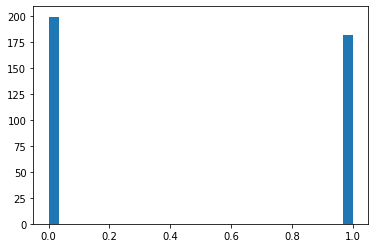

In [47]:
plt.hist(dft.home_team_win, bins=30)

In [70]:
import numpy as np
np.random.seed(40)
sample_home= np.random.choice(home_team_win_array,size=100)


In [71]:
np.random.seed(40)
sample_home_mean= np.random.choice(home_team_win_array,size=100).mean() 
sample_home_mean

0.43

In [72]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

welch_t(home_team_win_array, sample_home)

0.8273436558125328

In [73]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

welch_df(home_team_win_array, sample_home)

155.7569848526001

In [74]:
t = welch_t(home_team_win_array, sample_home)
df = welch_df(home_team_win_array, sample_home)
print(t,df)

0.8273436558125328 155.7569848526001


In [75]:
import scipy.stats as stats

In [76]:
p = 1 - stats.t.cdf(t, df)
print(p)

0.20465402766769258


In [9]:
dft.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [10]:
import json
import pandas as pd
f = open('player_data.txt')
data = json.load(f)
df = pd.DataFrame(data['data'])
df.head()

id  competition_id                full_name     first_name  \
0  463545            1625    David de Gea Quintana          David   
1    4290            1625           Matteo Darmian         Matteo   
2    3040            1625  Victor Nilsson Lindelöf         Victor   
3    4120            1625                Luke Shaw           Luke   
4    4121            1625     Eric Bertrand Bailly  Eric Bertrand   

          last_name                 known_as                shorthand  age  \
0   de Gea Quintana             David de Gea             david-de-gea   28   
1           Darmian           Matteo Darmian           matteo-darmian   29   
2  Nilsson Lindelöf  Victor Nilsson Lindelöf  victor-nilsson-lindelof   25   
3              Shaw                Luke Shaw                luke-shaw   24   
4            Bailly     Eric Bertrand Bailly     eric-bertrand-bailly   25   

           league      league_type  ... red_cards_overall  min_per_match  \
0  Premier League  Domestic League  ...                 0             90   
1  Premier League  Domestic League  ...                 0             74   
2  Premier League  Domestic League  ...                 0             87   
3  Premier League  Domestic League  ...                 0             89   
4  Premier League  Domestic League  ...                 1             53   

   min_per_card_overall min_per_assist_overall  cards_per_90_overall  \
0                  3420                      0                  0.03   
1                     0                      0                  0.00   
2                  2602                   2602                  0.03   
3                   236                    648                  0.38   
4                   319                      0                  0.28   

   rank_in_league_top_attackers  rank_in_league_top_midfielders  \
0                           310                             419   
1                           411                             366   
2                           263                             249   
3                           262                             104   
4                           340                             271   

  rank_in_league_top_defenders  rank_in_club_top_scorer  last_match_timestamp  
0                           90                       18            1557669600  
1                          102                       25            1556132400  
2                           88                       14            1557061200  
3                           79                       13            1557061200  
4                          142                       26            1556465400  

[5 rows x 63 columns]

In [11]:
df.columns

Index(['id', 'competition_id', 'full_name', 'first_name', 'last_name',
       'known_as', 'shorthand', 'age', 'league', 'league_type', 'season',
       'starting_year', 'ending_year', 'url', 'club_team_id', 'club_team_2_id',
       'national_team_id', 'position', 'minutes_played_overall',
       'minutes_played_home', 'minutes_played_away', 'birthday', 'nationality',
       'continent', 'appearances_overall', 'appearances_home',
       'appearances_away', 'goals_overall', 'goals_home', 'goals_away',
       'clean_sheets_home', 'clean_sheets_away', 'clean_sheets_overall',
       'conceded_overall', 'conceded_home', 'conceded_away', 'assists_overall',
       'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
       'penalty_success', 'goals_involved_per_90_overall',
       'assists_per_90_overall', 'goals_per_90_overall',
       'clean_sheets_per_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_c

In [ ]:
matches_view= df[df[home]]